In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import os

In [11]:
from allensdk.api.queries.rma_api import RmaApi
rma = RmaApi()

In [36]:
def get_proj_metric_value(path,target_area,source_area,experiment):
    filename = 'area_id_'+str(source_area)+'exp_id_'+str(experiment)+'.csv'
    data_df = pd.read_csv(path / filename)
    return data_df[(data_df['hemisphere_id']==1) & (data_df['structure_id']==target_area)]['projection_energy'].item()

def query_structure_by_acronym(s_acronym):
    query = rma.model_query('StructureLookup', criteria="structure[acronym$eq"+str(s_acronym)+"]",include="structure")[0]
    return query['structure']

def query_structure_by_id(s_id):
    query = rma.model_query('StructureLookup', criteria="structure[id$eq"+str(s_id)+"]",include="structure")[0]
    return query['structure']

In [29]:
target_area_name = 'RSPagl'
target_area_id = query_structure_by_acronym(target_area_name)['id']

In [30]:
path = Path.home() / 'Desktop' / 'data' / 'connectivity'
filename = path / 'filtered_area_experiment_id_dict_2_hem_1_RSPagl_vol.pkl'
with open(filename, 'rb') as f: data_dict = pickle.load(f)

In [59]:
# f, axes = plt.subplots(2, len(data_dict)//2, figsize=(20,500))

# i = 0
# plot_col = 0

area_list = []
mean_std_arr = []

for area, exps_list in data_dict.items():
    
    if i == len(data_dict)//2: plot_col = 1
    
    # print(f'{area}:')
    area_data = []
    for e in exps_list:
        area_data.append(get_proj_metric_value(filepath,target_area_id , area, e))
        # print(f'experiment {e} == {get_proj_metric_value(filepath,target_area_id , area, e)}')
    area_data = np.array(area_data)
    
    area_list.append(area)
    mean_std_arr.append([area_data.mean(), area_data.std()])
    
    # print(f'area {area} mean = {area_data.mean()} std = {area_data.std()}')
    # axes[i][plot_col].hist(area_data)
    # axes[i][plot_col].title(query_structure_by_id(area)['acronym']+' '+str(area))
# plt.show()

/home/ikharitonov/anaconda3/envs/allendata/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/home/ikharitonov/anaconda3/envs/allendata/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ikharitonov/anaconda3/envs/allendata/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/ikharitonov/anaconda3/envs/allendata/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/ikharitonov/anaconda3/envs/allendata/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [72]:
mean_std_arr = np.array(mean_std_arr)
area_list = np.array(area_list)

In [73]:
area_list.shape

(316,)

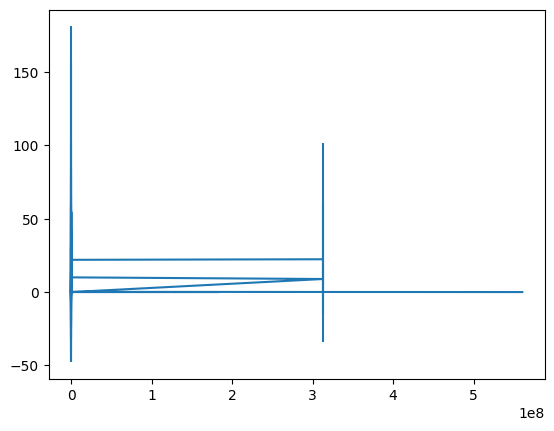

In [74]:
plt.errorbar(area_list,mean_std_arr[:,0],yerr=mean_std_arr[:,1])
plt.show()

In [46]:
# impletement volume thresholding - get the value of injection/target volume from unionized data - filter out low volume experiments

In [58]:
path = Path.home() / 'Desktop' / 'data' / 'connectivity' / 'unionized_data_from_hem_1_RSPagl_projecting_experiments'
filename = 'area_id_795exp_id_272699357.csv'
data_df = pd.read_csv(path / filename)
data_df[(data_df['hemisphere_id']==1) & (data_df['structure_id']==target_area_id)]

,Unnamed: 0,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,section_data_set_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
829,829,1,631425362,False,0.410302,7610,990,4510,0.00252,0.000246,0.113906,462.187577,0.00032,272699357,894,1.748340e+11,1.060688e+09,120818269.5,261405.272461,1.299343


In [ ]:
# see if projection energy is normalised with respect to injection volume